In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('heart.csv')

In [6]:
print('Shape of data :',data.shape)

Shape of data : (303, 14)


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Data set description

1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [10]:
print('Number of null rows in each column :')
print(data.isnull().sum())

Number of null rows in each column :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
print('Correlation of other columns with target column :')
print(data.corr()["target"].abs().sort_values(ascending=False))

Correlation of other columns with target column :
target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Spliting of data into training and testing

In [12]:
def split_data(training_size):
    predictors = data.drop("target",axis=1)
    target = data["target"]
    X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=(1-training_size),random_state=0)
    print("\n Training features have {0} records and Testing features have {1} records.".\
          format(X_train.shape[0], X_test.shape[0]))
    
    return X_train,X_test,Y_train,Y_test

### Confusion matrix function

In [13]:
def my_confusion_matrix(Y_test,y_test_predicted):
    cm = confusion_matrix(Y_test,y_test_predicted)
    print('Confusion Matrix of the Classifier:')
    print(cm)

    sns.heatmap(cm,annot = True,cmap='coolwarm', fmt = "d")

### Precision,Recall and F-score function

In [14]:
def calculate_score(Y_test, y_test_predicted):

    my_precision_score = precision_score(Y_test, y_test_predicted)
    print(' Precision Score of the Classifier is : '+str(my_precision_score))

    my_recall_score = recall_score(Y_test, y_test_predicted)
    print(' Recall Score of the Classifier is : '+str(my_recall_score))

    my_f_score = f1_score(Y_test, y_test_predicted)
    print(' F-Score of the Classifier is : '+str(my_f_score))

In [15]:
training_size = 0.7
X_train,X_test,Y_train,Y_test = split_data(training_size)


 Training features have 212 records and Testing features have 91 records.


# Logistic Regression

In [16]:
logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train, Y_train)

print('Logistic Regression Classfier')

y_train_predicted_logistic = logistic_clf.predict(X_train)
print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_logistic)))

y_test_predicted_logistic = logistic_clf.predict(X_test)
print('Testing accuracy : %.4f' % (100*acc(Y_test, y_test_predicted_logistic)))

Logistic Regression Classfier
Training accuracy : 86.3208
Testing accuracy : 80.2198


Logistic Regression
Confusion Matrix of the Classifier:
[[32 12]
 [ 6 41]]
 Precision Score of the Classifier is : 0.7735849056603774
 Recall Score of the Classifier is : 0.8723404255319149
 F-Score of the Classifier is : 0.8200000000000001


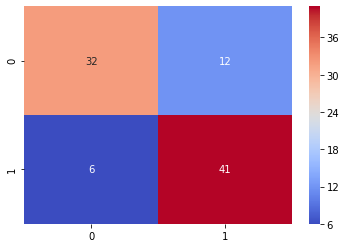

In [17]:
print('Logistic Regression')
my_confusion_matrix(Y_test,y_test_predicted_logistic)
calculate_score(Y_test, y_test_predicted_logistic)

# Decision Tree Using Gini Index (Using Sklearn)

In [18]:
decision_tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth=3,max_features = 5, random_state=0)

decision_tree_clf.fit(X_train, Y_train)

print('Decision Tree Classfier')

y_train_predicted_dt = decision_tree_clf.predict(X_train)

print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

y_test_predicted_dt = decision_tree_clf.predict(X_test)
print('Testing accuracy : %.4f' % (100*acc(Y_test, y_test_predicted_dt)))

Decision Tree Classfier
Training accuracy : 84.9057
Testing accuracy : 75.8242


Decision Tree Using Gini Index (Using Sklearn)
Confusion Matrix of the Classifier:
[[32 12]
 [10 37]]
 Precision Score of the Classifier is : 0.7551020408163265
 Recall Score of the Classifier is : 0.7872340425531915
 F-Score of the Classifier is : 0.7708333333333333


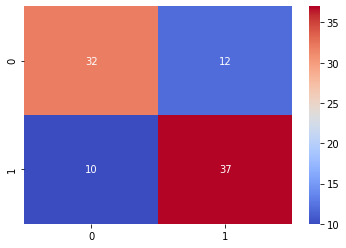

In [19]:
print('Decision Tree Using Gini Index (Using Sklearn)')
my_confusion_matrix(Y_test,y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# Decision Tree Using Information Gain (Using Sklearn)

In [20]:
decision_tree_clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3,max_features = 5, random_state=0)

decision_tree_clf.fit(X_train, Y_train)

print('Decision Tree Classfier')

y_train_predicted_dt = decision_tree_clf.predict(X_train)
print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

y_test_predicted_dt = decision_tree_clf.predict(X_test)
print('Testing accuracy : %.4f' % (100*acc(Y_test, y_test_predicted_dt)))

Decision Tree Classfier
Training accuracy : 84.4340
Testing accuracy : 76.9231


Decision Tree Using Information Gain (Using Sklearn)
Confusion Matrix of the Classifier:
[[32 12]
 [ 9 38]]
 Precision Score of the Classifier is : 0.76
 Recall Score of the Classifier is : 0.8085106382978723
 F-Score of the Classifier is : 0.7835051546391754


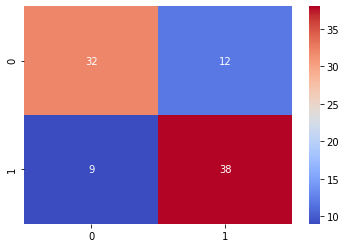

In [21]:
print('Decision Tree Using Information Gain (Using Sklearn)')
my_confusion_matrix(Y_test,y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# Decision Tree Using Gini Index (from scratch) 

In [22]:
class Node:
    def __init__(self, predict_ginied_class):
        self.predict_ginied_class = predict_ginied_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class Decision_Tree_Classifier_Gini:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit_gini(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict_gini(self, X):
        return [self._predict_gini(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predict_ginied_class = np.argmax(num_samples_per_class)
        node = Node(predict_ginied_class=predict_ginied_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict_gini(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predict_ginied_class

In [23]:
X_train_np_array = X_train.values
Y_train_np_array = Y_train.values
X_test_np_array = X_test.values

# Fit data
clf = Decision_Tree_Classifier_Gini(max_depth=3)

clf.fit_gini(X_train_np_array,Y_train_np_array)

y_train_predicted_dt = clf.predict_gini(X_train_np_array)

print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

y_test_predicted_dt = clf.predict_gini(X_test_np_array)


print(' Testing Accuracy obtained :',(100*acc(Y_test, y_test_predicted_dt)))

Training accuracy : 86.7925
 Testing Accuracy obtained : 81.31868131868131


Confusion Matrix of the Classifier:
[[32 12]
 [ 5 42]]
 Precision Score of the Classifier is : 0.7777777777777778
 Recall Score of the Classifier is : 0.8936170212765957
 F-Score of the Classifier is : 0.8316831683168316


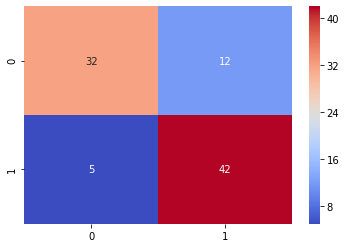

In [24]:
my_confusion_matrix(Y_test, y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# Decision Tree Using Information Gain (from scratch) 

In [25]:
def My_entropy(y):
    histo = np.bincount(y)
    p_s = histo / len(y)
    return -np.sum([p * np.log2(p) for p in p_s if p > 0])


class node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_nodes(self):
        return self.value is not None


class MyDecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def my_fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])
        self.root = self.grow_tree(X, y)

    def my_predict(self, X):
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self.most_common_label(y)
            return node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_features, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self.best_criteria(X, y, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self.split(X[:, best_feat], best_thresh)
        left = self.grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self.grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return node(best_feat, best_thresh, left, right)

    def best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self.information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_My_entropy = My_entropy(y)

        # generate split
        left_idxs, right_idxs = self.split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = My_entropy(y[left_idxs]), My_entropy(y[right_idxs])
        child_My_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_My_entropy - child_My_entropy
        return ig

    def split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def traverse_tree(self, x, node):
        if node.is_leaf_nodes():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)

    def most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [26]:
X_train_np_array = X_train.values
Y_train_np_array = Y_train.values
X_test_np_array = X_test.values

# Fit data.
clf = MyDecisionTree(max_depth=3)
clf.my_fit(X_train_np_array,Y_train_np_array)
y_test_predicted_dt = clf.my_predict(X_test_np_array)

print('Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

y_test_predicted_dt = clf.my_predict(X_test_np_array)


print('Accuracy obtained :',(100*acc(Y_test, y_test_predicted_dt)))

Training accuracy : 86.7925
Accuracy obtained : 75.82417582417582


Decision Tree Using Information Gain (from scratch)
Confusion Matrix of the Classifier:
[[32 12]
 [10 37]]
 Precision Score of the Classifier is : 0.7551020408163265
 Recall Score of the Classifier is : 0.7872340425531915
 F-Score of the Classifier is : 0.7708333333333333


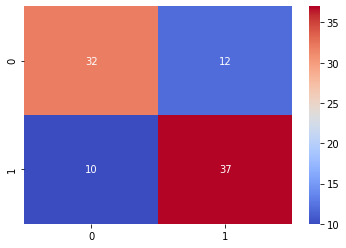

In [27]:
print('Decision Tree Using Information Gain (from scratch)')
my_confusion_matrix(Y_test,y_test_predicted_dt)
calculate_score(Y_test, y_test_predicted_dt)

# 2 (1) Training the model with different percentage of training data

## Decision Tree Using Gini Index 

In [28]:
print('******************** Decision Tree Classfier(Gini Index) ********************')
testing_accuracy = []
training_percentage= np.arange(0.5,1,0.05)

X_train_np_array = X_train.values
Y_train_np_array = Y_train.values
X_test_np_array = X_test.values

for i in range(len(training_percentage)):
    decision_tree_clf = DecisionTreeClassifier(random_state=0)
    X_train,X_test,Y_train,Y_test = split_data(training_percentage[i])
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Percentage of training data used :',int(100*training_percentage[i]),'%')
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Gini Index) ********************

 Training features have 151 records and Testing features have 152 records.

 Percentage of training data used : 50 %

 Training accuracy : 100.0000

 Testing accuracy : 71.7105
****************************************************

 Training features have 166 records and Testing features have 137 records.

 Percentage of training data used : 55 %

 Training accuracy : 100.0000

 Testing accuracy : 70.8029
****************************************************

 Training features have 181 records and Testing features have 122 records.

 Percentage of training data used : 60 %

 Training accuracy : 100.0000

 Testing accuracy : 69.6721
****************************************************

 Training features have 196 records and Testing features have 107 records.

 Percentage of training data used : 65 %

 Training accuracy : 100.0000

 Testing accuracy : 71.9626
***************************************************

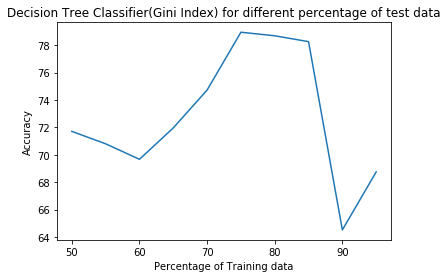

In [29]:
plt.xlabel("Percentage of Training data")
plt.ylabel("Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different percentage of test data')

plt.plot((100*training_percentage),testing_accuracy)

## Decision Tree Using Information Gain 

In [30]:
print('******************** Decision Tree Classfier(Information Gain) ********************')
testing_accuracy = []
training_percentage= np.arange(0.5,1,0.05)
for i in range(len(training_percentage)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "entropy", random_state=0)
    X_train,X_test,Y_train,Y_test = split_data(training_percentage[i])
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Percentage of test data used :',int(100*training_percentage[i]),'%')
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Information Gain) ********************

 Training features have 151 records and Testing features have 152 records.

 Percentage of test data used : 50 %

 Training accuracy : 100.0000

 Testing accuracy : 72.3684
****************************************************

 Training features have 166 records and Testing features have 137 records.

 Percentage of test data used : 55 %

 Training accuracy : 100.0000

 Testing accuracy : 72.2628
****************************************************

 Training features have 181 records and Testing features have 122 records.

 Percentage of test data used : 60 %

 Training accuracy : 100.0000

 Testing accuracy : 74.5902
****************************************************

 Training features have 196 records and Testing features have 107 records.

 Percentage of test data used : 65 %

 Training accuracy : 100.0000

 Testing accuracy : 73.8318
****************************************************

 Traini

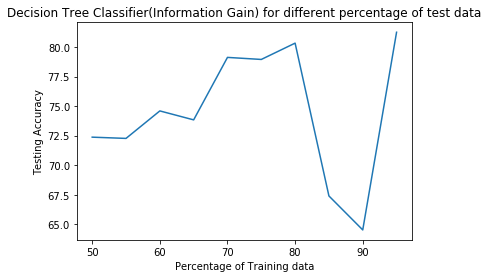

In [31]:
plt.xlabel("Percentage of Training data")
plt.ylabel("Testing Accuracy")
plt.title('Decision Tree Classifier(Information Gain) for different percentage of test data')

plt.plot((100*training_percentage),testing_accuracy)

# 2 (2) Training the model with different depths

## Decision Tree Using Gini Index

In [32]:
print('******************** Decision Tree Classfier(Gini Index) ********************')
testing_accuracy = []
testing_depth= np.arange(1,11)
X_train,X_test,Y_train,Y_test = split_data(0.7)
X_train_np_array = X_train.values
Y_train_np_array = Y_train.values
X_test_np_array = X_test.values


for i in range(len(testing_depth)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "gini",max_depth=testing_depth[i], random_state=0)
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Max Depth Used :',testing_depth[i])
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Gini Index) ********************

 Training features have 212 records and Testing features have 91 records.

 Max Depth Used : 1

 Training accuracy : 75.4717

 Testing accuracy : 76.9231
****************************************************

 Max Depth Used : 2

 Training accuracy : 80.1887

 Testing accuracy : 73.6264
****************************************************

 Max Depth Used : 3

 Training accuracy : 86.7925

 Testing accuracy : 81.3187
****************************************************

 Max Depth Used : 4

 Training accuracy : 86.7925

 Testing accuracy : 76.9231
****************************************************

 Max Depth Used : 5

 Training accuracy : 94.3396

 Testing accuracy : 73.6264
****************************************************

 Max Depth Used : 6

 Training accuracy : 97.1698

 Testing accuracy : 74.7253
****************************************************

 Max Depth Used : 7

 Training accuracy : 98.584

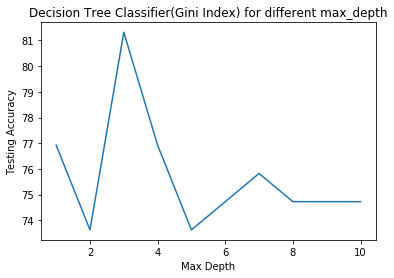

In [33]:
plt.xlabel("Max Depth")
plt.ylabel("Testing Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different max_depth')

plt.plot(testing_depth,testing_accuracy)

## Decision Tree Using Information Gain

In [34]:
print('******************** Decision Tree Classfier(Information Gain) ********************')
testing_accuracy = []
testing_depth= np.arange(1,11)
X_train,X_test,Y_train,Y_test = split_data(0.7)
X_train_np_array = X_train.values
Y_train_np_array = Y_train.values
X_test_np_array = X_test.values


for i in range(len(testing_depth)):
    decision_tree_clf = DecisionTreeClassifier(criterion = "entropy",max_depth=testing_depth[i], random_state=0)
    decision_tree_clf.fit(X_train, Y_train)
    
    print('\n Max Depth Used :',testing_depth[i])
    
    y_train_predicted_dt = decision_tree_clf.predict(X_train)
    print('\n Training accuracy : %.4f' % (100*acc(Y_train, y_train_predicted_dt)))

    y_test_predicted_dt = decision_tree_clf.predict(X_test)
    
    testing_accuracy.append(100*acc(Y_test, y_test_predicted_dt))
    print('\n Testing accuracy : %.4f' % testing_accuracy[i])
    print('****************************************************')

******************** Decision Tree Classfier(Information Gain) ********************

 Training features have 212 records and Testing features have 91 records.

 Max Depth Used : 1

 Training accuracy : 75.4717

 Testing accuracy : 76.9231
****************************************************

 Max Depth Used : 2

 Training accuracy : 78.3019

 Testing accuracy : 73.6264
****************************************************

 Max Depth Used : 3

 Training accuracy : 86.3208

 Testing accuracy : 75.8242
****************************************************

 Max Depth Used : 4

 Training accuracy : 86.7925

 Testing accuracy : 75.8242
****************************************************

 Max Depth Used : 5

 Training accuracy : 94.8113

 Testing accuracy : 79.1209
****************************************************

 Max Depth Used : 6

 Training accuracy : 97.6415

 Testing accuracy : 80.2198
****************************************************

 Max Depth Used : 7

 Training accuracy : 

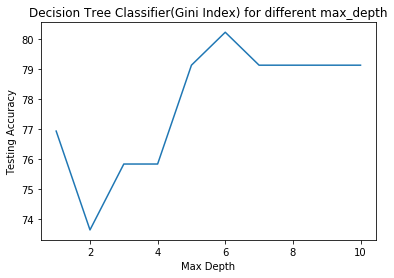

In [35]:
plt.xlabel("Max Depth")
plt.ylabel("Testing Accuracy")
plt.title('Decision Tree Classifier(Gini Index) for different max_depth')

plt.plot(testing_depth,testing_accuracy)